### HOOMD hard disks MC simulation

In [1]:
# import hoomd
# from hoomd import hpmc, md
import numpy as np
# import hoomd.htf as htf
import tensorflow as tf

In [2]:
print(np.__version__)

1.19.5


In [53]:
hoomd.context.initialize('')

In [3]:
import numpy as np
phi = 0.75 # packing fraction
sigma = 1
N = 64
L = (N*(np.pi*0.25*sigma**2)/phi)**0.5
a = L/np.sqrt(N)

In [56]:
system = hoomd.init.read_snapshot(snap)

notice(2): Group "all" created containing 64 particles


In [58]:
# for i in system.particles:
#     i.position = (1,2,0)

In [59]:
for i in system.particles:
    print(i.position)

(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.0, 0.0)
(1.0, 2.

In [6]:
mc = hpmc.integrate.sphere(seed=123)

In [7]:
sigma=1
mc.shape_param.set('A',diameter=sigma)

In [8]:
gsd = hoomd.dump.gsd('trajectory.gsd',period=1,group=hoomd.group.all(),overwrite=True)

In [9]:
mc.set_params(d=0.05)

In [10]:
hoomd.run(1000000)

** starting run **
Time 00:00:12 | Step 97695 / 1000000 | TPS 9769.48 | ETA 00:01:32
Time 00:00:22 | Step 195999 / 1000000 | TPS 9830.37 | ETA 00:01:21
Time 00:00:32 | Step 294078 / 1000000 | TPS 9807.84 | ETA 00:01:11
Time 00:00:42 | Step 394887 / 1000000 | TPS 10080.9 | ETA 00:01:00
Time 00:00:52 | Step 493141 / 1000000 | TPS 9825.39 | ETA 00:00:51
Time 00:01:02 | Step 590815 / 1000000 | TPS 9767.37 | ETA 00:00:41
Time 00:01:12 | Step 693588 / 1000000 | TPS 10277.2 | ETA 00:00:29
Time 00:01:22 | Step 794633 / 1000000 | TPS 10104.5 | ETA 00:00:20
Time 00:01:32 | Step 895802 / 1000000 | TPS 10116.9 | ETA 00:00:10
Time 00:01:42 | Step 995421 / 1000000 | TPS 9961.88 | ETA 00:00:00
Time 00:01:42 | Step 1000000 / 1000000 | TPS 9962.14 | ETA 00:00:00
Average TPS: 9954.13
---------
notice(2): -- HPMC stats:
notice(2): Average translate acceptance: 0.550856
notice(2): Trial moves per second:        2.54823e+06
notice(2): Overlap checks per second:     5.18376e+07
notice(2): Overlap checks per

In [11]:
snap = system.take_snapshot()

In [3]:
def plot_config(pts,L=1):
    fig, ax = plt.subplots()
    fig.set_size_inches(5,5)
    circles = [plt.Circle(p,.5) for p in pts]
    for c in circles:
        ax.add_patch(c)
    ax.set_xlim(-L/2,L/2)
    ax.set_ylim(-L/2,L/2)

In [28]:
import matplotlib.pyplot as plt
def plot_config_wrap(pts,L=1,title=None):
    fig, ax = plt.subplots()
    lm = 1 # length_multiplier - for larger plots
    if len(pts > 256):
        lm = np.sqrt(len(pts)/256.0)
    if len(pts > 256*9):
        lm = 3
    fig.set_size_inches(5*lm,5*lm)
    pts_addl = []
    for p in pts:
        if p[0] < -L/2+0.5:
            pts_addl.append([p[0]+L, p[1]])  
            if p[1] < -L/2+0.5:
                pts_addl.append([p[0]+L, p[1]+L])
            if p[1] > -L/2+0.5:
                pts_addl.append([p[0]+L, p[1]-L])
        if p[0] > -L/2+0.5:
            pts_addl.append([p[0]-L, p[1]])
            if p[1] < -L/2+0.5:
                pts_addl.append([p[0]-L, p[1]+L])
            if p[1] > -L/2+0.5:
                pts_addl.append([p[0]-L, p[1]-L])
        if p[1] < -L/2+0.5:
            pts_addl.append([p[0], p[1]+L])
        if p[1] > -L/2+0.5:
            pts_addl.append([p[0], p[1]-L])
        
    circles = [plt.Circle(p,.5,alpha=0.5,ec='red') for p in pts]
    circles2 = [plt.Circle(p,.5,alpha=0.5,ec='red') for p in pts_addl]
    for c in circles:
        ax.add_patch(c)
    for c in circles2:
        ax.add_patch(c)
    ax.set_xlim(-L/2,L/2)
    ax.set_ylim(-L/2,L/2)
    if title is not None:
        ax.set_title(title)

In [5]:
import matplotlib.pyplot as plt
def plot_config_wrap_multiple(pts,L=1,title=None,first=False,fig=None,ax=None):
    if first:
        fig, ax = plt.subplots()
        lm = 1 # length_multiplier - for larger plots
        if len(pts > 256):
            lm = np.sqrt(len(pts)/256.0)
        if len(pts > 256*4):
            lm = 2
        fig.set_size_inches(6*lm,6*lm)
    pts_addl = []
    for p in pts:
        if p[0] < -L/2+0.5:
            pts_addl.append([p[0]+L, p[1]])  
            if p[1] < -L/2+0.5:
                pts_addl.append([p[0]+L, p[1]+L])
            if p[1] > -L/2+0.5:
                pts_addl.append([p[0]+L, p[1]-L])
        if p[0] > -L/2+0.5:
            pts_addl.append([p[0]-L, p[1]])
            if p[1] < -L/2+0.5:
                pts_addl.append([p[0]-L, p[1]+L])
            if p[1] > -L/2+0.5:
                pts_addl.append([p[0]-L, p[1]-L])
        if p[1] < -L/2+0.5:
            pts_addl.append([p[0], p[1]+L])
        if p[1] > -L/2+0.5:
            pts_addl.append([p[0], p[1]-L])
        
    circles = [plt.Circle(p,.5,alpha=0.1,ec='red') for p in pts]
    circles2 = [plt.Circle(p,.5,alpha=0.1,ec='red') for p in pts_addl]
    for c in circles:
        ax.add_patch(c)
    for c in circles2:
        ax.add_patch(c)
    ax.set_xlim(-L/2,L/2)
    ax.set_ylim(-L/2,L/2)
    if title is not None:
        ax.set_title(title)
    if first:
        return fig, ax

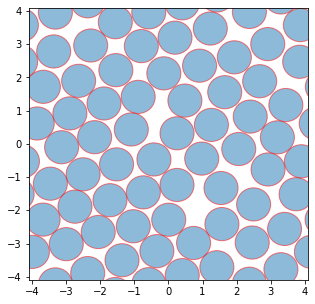

In [14]:
pts = snap.particles.position[:]
plot_config_wrap(pts,L=system.box.Lx)

### Invertible network for hard particles

In [6]:
# Maximum likelihood in z
import tensorflow as tf
def loss_z(inv_net):
    return -inv_net.log_likelihood_z_normal()

In [7]:
import tensorflow as tf
def loss_x(inv_net):
    x = inv_net.output_x
    f = inv_net.overlap_model.smooth_overlap_tf(x)
    #return tf.where(f>0,tf.math.log(f)-inv_net.log_det_Jzx[:,0],0)
    #return f*tf.math.exp(-inv_net.log_det_Jzx[:,0])
    return f-inv_net.log_det_Jzx[:,0]
    #return f*tf.math.exp(-inv_net.log_det_Jzx[:,0])
    

In [8]:
import tensorflow.keras as keras
import tensorflow as tf
from deep_boltzmann.networks.invertible import InvNet

class OverlapInvNet(InvNet):

    def __init__(self, overlap_model, layers):
        """ Invertible net where we have an overlap function (==0 or 1) that defines p(x)
            and the prior is the uniform on the interval [a,b)"""
        self.overlap_model = overlap_model
        super().__init__(overlap_model.dim, layers, prior='normal')
        
        self.Tzx.add_loss(loss_x(self))
        self.Txz.add_loss(loss_z(self))
        
    @classmethod
    def load(cls, filename, energy_model):
        """ Loads parameters into model. Careful: this clears the whole TF session!!
        """
        from deep_boltzmann.util import load_obj
        keras.backend.clear_session()
        D = load_obj(filename)
        layerdicts = D['layers']
        layers = [eval(d['type']).from_dict(d) for d in layerdicts]
        return EnergyInvNet(energy_model, layers, prior=prior)

    def weight(self):
        """ Computes the reweighting factor
        """
        z = self.input_z
        x = self.output_x
        # compute overlap property
        f = self.overlap_model.smooth_overlap_tf(x)
        weight = tf.math.exp(self.log_det_Jzx[:, 0])
        return weight

    def sample(self, nsample=100000, temperature=1.0):
        """ Samples from prior distribution in z and produces generated x configurations

        Parameters:
        -----------
        temperature : float
            Relative temperature. Equal to the variance of the isotropic Gaussian sampled in z-space.
        nsample : int
            Number of samples

        Returns:
        --------
        sample_z : array
            Samples in z-space
        sample_x : array
            Samples in x-space
        weight_z:
            Weight of z samples
        overlap_x : array
            Overlap property of x samples
        w : array
            Weight of samples

        """

        sample_z, energy_z = self.sample_z(nsample=nsample, return_energy=True, temperature=temperature)

        sample_x, Jzx = self.transform_zxJ(sample_z)
        overlap_x = self.overlap_model.smooth_overlap_tf(sample_x).numpy()
        print(overlap_x)
        w = np.exp(Jzx)
        logw = overlap_x + energy_z + Jzx

        return sample_z, sample_x, energy_z, overlap_x, w, logw

    
    def train_z(self, x, xval=None, optimizer=None, lr=0.001, epochs=2000, batch_size=1024, verbose=1, clipnorm=None):
        if optimizer is None:
            if clipnorm is None:
                optimizer = keras.optimizers.Adam(lr=lr)
            else:
                optimizer = keras.optimizers.Adam(lr=lr, clipnorm=clipnorm)
                
        self.Txz.compile(optimizer)

        if xval is not None:
            validation_data = (xval, np.zeros_like(xval))
        else:
            validation_data = None

        hist = self.Txz.fit(x=x, validation_data=validation_data,
                            batch_size=batch_size, epochs=epochs, verbose=verbose, shuffle=True)

        return hist
    
    def train_x(self, optimizer=None, lr=0.001, batches=1,epochs=2000, batch_size=1024, verbose=1, clipnorm=None):
        if optimizer is None:
            if clipnorm is None:
                optimizer = keras.optimizers.Adam(lr=lr)
            else:
                optimizer = keras.optimizers.Adam(lr=lr, clipnorm=clipnorm)
                
        self.Tzx.compile(optimizer)

        x = self.sample_z(nsample=batches*batch_size, return_energy=False)
        hist = self.Tzx.fit(x=x,batch_size=batch_size, epochs=epochs, verbose=verbose, shuffle=True)

        return hist

    def train_both(self, x, xval=None, optimizer=None, lr=0.001, epochs=2000, batch_size=1024, verbose=1, clipnorm=None):
        if optimizer is None:
            if clipnorm is None:
                optimizer = keras.optimizers.Adam(lr=lr)
            else:
                optimizer = keras.optimizers.Adam(lr=lr, clipnorm=clipnorm)
       
        inputs = []
        outputs = []
        losses = []
        losses.append(loss_z(self))
        losses.append(loss_x(self))
        inputs.append(self.input_x)
        inputs.append(self.input_z)
        outputs.append(self.output_z)
        outputs.append(self.output_x)

        self.model = keras.models.Model(inputs=inputs, outputs=outputs)
        l = losses[0]+losses[1]
        self.model.add_loss(l)
        self.model.compile(optimizer=optimizer)
        
        if xval is not None:
            validation_data = (xval, np.zeros_like(xval))
        else:
            validation_data = None

        w = self.sample_z(nsample=x.shape[0], return_energy=False)
        hist = self.model.fit(x=[x,w], validation_data=validation_data,
                            batch_size=batch_size, epochs=epochs, verbose=verbose, shuffle=True)

        return hist

In [9]:
class Limit(object):
    def __init__(self, dim, L=1):
        self.L = L
        self.dim = dim
    
        self.tanh = tf.keras.layers.Activation('tanh')
        self.scale = tf.keras.layers.experimental.preprocessing.Rescaling(scale=self.L/2)
        self.inv_scale = tf.keras.layers.experimental.preprocessing.Rescaling(scale=2/self.L)
        self.atanh = tf.keras.layers.Activation(lambda x: tf.atanh(x))
        
    def connect_xz(self, x):
        def lambda_Jxz(x):
            J = -tf.math.log(1-(2*x/self.L)**2)
            return tf.reduce_sum(J,axis=-1)[0] * tf.ones((tf.shape(x)[0], 1))
        self.log_det_xz = keras.layers.Lambda(lambda_Jxz)(x)
        z = self.atanh(self.inv_scale(x))
        return z

    def connect_zx(self, z):
        def lambda_Jzx(z):
            J = -tf.math.log(tf.cosh(z)**2)
            return tf.reduce_sum(J,axis=-1)[0] * tf.ones((tf.shape(z)[0], 1))
        self.log_det_zx = keras.layers.Lambda(lambda_Jzx)(z)
        x = self.scale(self.tanh(z))
        return x

    @property
    def log_det_Jxz(self):
        """ Log of |det(dz/dx)| for the current batch. Format is batchsize x 1 or a number """
        return self.log_det_xz

    @property
    def log_det_Jzx(self):
        """ Log of |det(dx/dz)| for the current batch. Format is batchsize x 1 or a number """
        return self.log_det_zx


In [10]:
from deep_boltzmann.networks.invertible import split_merge_indices, SplitChannels, MergeChannels, \
                                               RealNVP, NICER, InvNet, nonlinear_transform, Scaling

def invnet(dim, layer_types, overlap_model=None, channels=None, L=1.0,
           nl_layers=2, nl_hidden=100, nl_activation='relu',
           nl_activation_t='relu',scale=None, prior='normal'):
    """
    layer_types : str
        String describing the sequence of layers. Usage:
            N NICER layer
            R RealNVP layerl
            S Scaling layer
        Splitting and merging layers will be added automatically
    overlap_model : Overlap model class
        Class with overlap_tf() and dim
    channels : array or None
        Assignment of dimensions to channels (0/1 array of length ndim)
    nl_layers : int
        Number of hidden layers in the nonlinear transformations
    nl_hidden : int
        Number of hidden units in each nonlinear layer
    nl_activation : str
        Activation functions used in the nonlinear layers
    scale : None or float
        If a scaling layer is used, fix the scale to this number. If None, scaling layers are trainable
    """
    # fix channels
    channels, indices_split, indices_merge = split_merge_indices(dim, nchannels=2, channels=channels)

    # augment layer types with split and merge layers
    split = False
    tmp = ''
    for ltype in layer_types:
        if (ltype == 'S' or ltype == 'L') and split:
            tmp += '>'
            split = False
        if (ltype == 'N' or ltype == 'R') and not split:
            tmp += '<'
            split = True
        tmp += ltype
    if split:
        tmp += '>'
    layer_types = tmp
    print(layer_types)

    # prepare layers
    layers = []

#     reg = tf.keras.regularizers.l2(.01) #?
    reg = None
    for ltype in layer_types:
        if ltype == '<':
            # split into two x channels
            layers.append(SplitChannels(dim, nchannels=2, channels=channels))
        if ltype == '>':
            # merge into one z channel
            layers.append(MergeChannels(dim, nchannels=2, channels=channels))
        if ltype == 'N':
            M1 = nonlinear_transform(indices_split[1].size, nlayers=nl_layers, nhidden=nl_hidden,
                                     activation=nl_activation)
            M2 = nonlinear_transform(indices_split[0].size, nlayers=nl_layers, nhidden=nl_hidden,
                                     activation=nl_activation)
            layers.append(NICER([M1, M2]))
        elif ltype == 'R':
            S1 = nonlinear_transform(indices_split[1].size, nlayers=nl_layers, nhidden=nl_hidden,
                                     activation=nl_activation, init_outputs=0,
                                     activity_regularizer=reg)
            T1 = nonlinear_transform(indices_split[1].size, nlayers=nl_layers, nhidden=nl_hidden,
                                     activation=nl_activation_t)
            S2 = nonlinear_transform(indices_split[0].size, nlayers=nl_layers, nhidden=nl_hidden,
                                     activation=nl_activation, init_outputs=0,
                                     activity_regularizer=reg)
            T2 = nonlinear_transform(indices_split[0].size, nlayers=nl_layers, nhidden=nl_hidden,
                                     activation=nl_activation_t)
            layers.append(RealNVP([S1, T1, S2, T2]))
        elif ltype == 'L':
            layers.append(Limit(dim, L=L))
        elif ltype == 'S':
            # scaling layer
            if scale is None:
                scaling_factors = None
            else:
                scaling_factors = scale * np.ones((1, dim))
            layers.append(Scaling(dim, scaling_factors=scaling_factors, trainable=(scale is None)))

    if overlap_model is None:
        inv_net = InvNet(dim, layers, prior='normal')
    else:
        inv_net = OverlapInvNet(overlap_model, layers)
    
    inv_net.reg = reg
    return inv_net

### Hard disk overlap

In [11]:
import numpy as np

def ensure_traj(X):
    if np.ndim(X) == 2:
        return X
    if np.ndim(X) == 1:
        return np.array([X])
    raise ValueError('Incompatible array with shape: ', np.shape(X))

    
def dist2_min_image(crd1, crd2, L, dim=2):
    """ Returns the distance matrix or matrices between particles, with periodic boundary conditions

    Parameters
    ----------
    crd1 : array or matrix
        first coordinate set
    crd2 : array or matrix
        second coordinate set
    L: length of simulation box
    dim : int
        dimension of particle system. If d=2, coordinate vectors are [x1, y1, x2, y2, ...]

    """
    crd1 = ensure_traj(crd1)
    crd2 = ensure_traj(crd2)
    n = int(np.shape(crd1)[1]/dim)

    crd1_components = [np.tile(np.expand_dims(crd1[:, i::dim], 2), (1, 1, n)) for i in range(dim)]
    crd2_components = [np.tile(np.expand_dims(crd2[:, i::dim], 2), (1, 1, n)) for i in range(dim)]
    
    dr_components = np.array([(crd1_components[i] - np.transpose(crd2_components[i], axes=(0, 2, 1))) for i in range(dim)])
    
    # minimum image
    D2_components = dr_components - L*((dr_components+0.5*L)//L)
    D2_components = D2_components**2
    D2 = np.sum(D2_components, axis=0)
    return D2

# class WCAPotential(htf.SimModel):
#     def setup(self, sigma):
#         self.avg_rdf = tf.keras.metrics.MeanTensor()
#         self.sigma = sigma
#     def compute(self, nlist):
#         # Use Weeks-Chandler-Anderson (WCA) repulisve potential
#         r12 = htf.nlist_rinv(nlist)**12 # nlist_rinv is neighbor 1 / r^12
#         # make it so anything above sigma is 0
#         r = tf.norm(nlist[:,:,:2], axis=2)
#         pair_energy = tf.cast(r < sigma, tf.float32) * r12
#         particle_energy = tf.reduce_sum(pair_energy, axis=1) # sum over neighbors  
#         all_energy = tf.reduce_sum(particle_energy)
# #         print(particle_energy)
# #         self.particle_e = particle_energy
# #         forces = htf.compute_nlist_forces(nlist, particle_energy)
#         # compute rdf
# #         inst_rdf = htf.compute_rdf(nlist, [0, 3.5])
# #         self.avg_rdf.update_state(inst_rdf)
#         return all_energy


class HardDisks(object):
    def __init__(self,N, L,sigma,eps=1):
        """ N: number of particles
            L: Box length
            sigma: Particle size"""
        self.N = N
        self.dim = 2*self.N # dim = 2
        self.L = L
        self.sigma = sigma
        self.mask_matrix = np.ones((self.N, self.N), dtype=np.float32)
        for i in range(self.N):
            self.mask_matrix[i, i] = 0.0
        self.eps=eps
        
#         self.hoomd_init()
        
    def hoomd_init(self):
        # Initialize an HOOMD md context as well as a potential function
        # Then whenever the equivalent of "smooth_overlap_tf" is called, return from the potential function
        hoomd.context.initialize('')
        self.box = hoomd.data.boxdim(L=self.L,dimensions=2)
        self.snap = hoomd.data.make_snapshot(N=self.N,particle_types=['A'],box=self.box)
        self.a = self.L/np.sqrt(self.N)
        self.snap.particles.position[:] = \
            [(i,j,0) for i in np.arange(-self.L/2,self.L/2,self.a) for j in np.arange(-self.L/2,self.L/2,self.a)]
        self.system = hoomd.init.read_snapshot(self.snap)
        hoomd.md.integrate.mode_standard(dt=0.0001)
        hoomd.md.integrate.nvt(group=hoomd.group.all(), kT=1e-6, tau=0.5).randomize_velocities(seed=1)
        self.model = WCAPotential(32, output_forces=False, sigma=self.sigma)
        self.nlist = hoomd.md.nlist.cell()
        self.tfcompute = htf.tfcompute(self.model)
        self.tfcompute.attach(self.nlist, r_cut=3, save_output_period=1)
        # Test run
        hoomd.run(1, quiet=True)
        print(self.model.compute(nlist=self.tfcompute.get_nlist_array().astype(np.float32)))
        
    def wrap(self, x):
        xcomp = x[:, 0::2]
        ycomp = x[:, 1::2]        
        xcomp -= ((xcomp+0.5*self.L)//self.L)*self.L
        ycomp -= ((ycomp+0.5*self.L)//self.L)*self.L
        out = np.zeros(shape=x.shape)
        out[:,0::2] = xcomp
        out[:,1::2] = ycomp
        return out
    
    def overlap(self, x):
        # all pairwise distances
        batchsize = np.shape(x)[0]
        D2 = dist2_min_image(x, x, self.L)
        mmatrix = np.tile(np.expand_dims(self.mask_matrix, 0), (batchsize, 1, 1))
        
        # overlap
        f = np.max(mmatrix*np.where(D2<self.sigma*self.sigma,1.0,0.0), axis=(1, 2))
        return f
    

    @tf.custom_gradient
    def tf_min_image(self,Dx):
        res = Dx-tf.math.floordiv(Dx+0.5*self.L,self.L)*self.L
        return res, lambda upstream: upstream

    def overlap_tf(self, x):

        xcomp = x[:, 0::2]
        ycomp = x[:, 1::2]
        batchsize = tf.shape(x)[0]
        n = tf.shape(xcomp)[1]
        Xcomp = tf.tile(tf.expand_dims(xcomp, 2), [1, 1, n])
        Ycomp = tf.tile(tf.expand_dims(ycomp, 2), [1, 1, n])
        Dx = Xcomp - tf.transpose(Xcomp, perm=[0, 2, 1])
        Dy = Ycomp - tf.transpose(Ycomp, perm=[0, 2, 1])

        # minimum image
        layer_min_image = tf.keras.layers.Lambda(lambda x: self.tf_min_image(x))
        Dx = layer_min_image(Dx) 
        Dy = layer_min_image(Dy) 
        D2 = Dx**2 + Dy**2

        mmatrix = tf.tile(tf.expand_dims(self.mask_matrix, 0), [batchsize, 1, 1])

        return tf.reduce_max(tf.where((D2<self.sigma*self.sigma),
                                      mmatrix*tf.ones_like(D2),tf.zeros_like(D2)),
                             axis=(1, 2))
    
    
    
    def smooth_overlap_tf(self, x):

        xcomp = x[:, 0::2]
        ycomp = x[:, 1::2]
        batchsize = tf.shape(x)[0]
        n = tf.shape(xcomp)[1]
        Xcomp = tf.tile(tf.expand_dims(xcomp, 2), [1, 1, n])
        Ycomp = tf.tile(tf.expand_dims(ycomp, 2), [1, 1, n])

        mmatrix = tf.tile(tf.expand_dims(self.mask_matrix, 0), [batchsize, 1, 1])

        # minimum image
        layer_min_image = tf.keras.layers.Lambda(lambda x: self.tf_min_image(x))
        Dx = Xcomp - tf.transpose(Xcomp, perm=[0, 2, 1])
        Dy = Ycomp - tf.transpose(Ycomp, perm=[0, 2, 1])
        Dx = layer_min_image(Dx) 
        Dy = layer_min_image(Dy) 
        D2 = Dx**2 + Dy**2

        mmatrix = tf.tile(tf.expand_dims(self.mask_matrix, 0), [batchsize, 1, 1])
        return tf.reduce_sum(self.eps*tf.nn.relu(mmatrix*(self.sigma-tf.math.sqrt(D2))), axis=(1, 2))

        # res = None
        # for i in range(-1,2):
        #     for j in range(-1,2):

        #       Dx = Xcomp - tf.transpose(Xcomp+i*self.L, perm=[0, 2, 1])
        #       Dy = Ycomp - tf.transpose(Ycomp+j*self.L, perm=[0, 2, 1])
        #       D2 = Dx**2 + Dy**2

        #       o = tf.reduce_sum(self.eps*tf.nn.relu(mmatrix*(self.sigma-tf.math.sqrt(D2))), axis=(1, 2))
        #       if res == None:
        #           res = o
        #       else:
        #           res += o
        # return res
        
    def smooth_overlap_tf_3(self, x):

        xcomp = x[:, 0::2]
        ycomp = x[:, 1::2]
        batchsize = tf.shape(x)[0]
        n = tf.shape(xcomp)[1]
        Xcomp = tf.tile(tf.expand_dims(xcomp, 2), [1, 1, n])
        Ycomp = tf.tile(tf.expand_dims(ycomp, 2), [1, 1, n])

        mmatrix = tf.tile(tf.expand_dims(self.mask_matrix, 0), [batchsize, 1, 1])

        # minimum image
        layer_min_image = tf.keras.layers.Lambda(lambda x: self.tf_min_image(x))
        Dx = Xcomp - tf.transpose(Xcomp, perm=[0, 2, 1])
        Dy = Ycomp - tf.transpose(Ycomp, perm=[0, 2, 1])
        Dx = layer_min_image(Dx) 
        Dy = layer_min_image(Dy) 
        D2 = Dx**2 + Dy**2

        mmatrix = tf.tile(tf.expand_dims(self.mask_matrix, 0), [batchsize, 1, 1])
        return tf.reduce_sum(self.eps*(tf.nn.relu(mmatrix*(self.sigma-tf.math.sqrt(D2)))), axis=(1, 2))
#         return tf.reduce_sum(self.eps*(tf.nn.relu(mmatrix*(self.sigma-tf.math.sqrt(D2)))+
#                                        1*mmatrix*tf.ones_like(D2)*(tf.cast(self.sigma-tf.math.sqrt(D2) > 0, tf.float32))), axis=(1, 2))    
#         return tf.reduce_sum(self.eps*mmatrix*tf.ones_like(D2)*(tf.cast(self.sigma-tf.math.sqrt(D2) > 0, tf.float32)), axis=(1, 2))
        
    def smooth_overlap_hoomd_tf(self, x):
        xcomp = x[:, 0::2]
        ycomp = x[:, 1::2]
        paddings = tf.constant([[0, 0], [0, 1], [0, 0]])
        
        
        pos = tf.pad(tf.stack((xcomp, ycomp), axis=1), paddings, "CONSTANT")
        pos = tf.transpose(pos[0])
        
        ####
        snap = hoomd.data.snapshot(n=self.N, particle_types = ['A'], box=hoomd.data.boxdim(L=self.L))
        snap.particles.position[:] = pos.numpy() #get the numpy of the pos, like 
        self.system.restore_snapshot(snap)
        ####
        
        for idx, particle in enumerate(self.system.particles):
            particle.position = pos[idx]
        hoomd.run(1, quiet=True)
        energy = self.model.compute(nlist=self.tfcompute.get_nlist_array().astype(np.float32))
#         print(energy)
        return energy

    def smooth_overlap_tf2(self, x):

        xcomp = x[:, 0::2]
        ycomp = x[:, 1::2]
        batchsize = tf.shape(x)[0]
        n = tf.shape(xcomp)[1]
        Xcomp = tf.tile(tf.expand_dims(xcomp, 2), [1, 1, n])
        Ycomp = tf.tile(tf.expand_dims(ycomp, 2), [1, 1, n])

        mmatrix = tf.tile(tf.expand_dims(self.mask_matrix, 0), [batchsize, 1, 1])

        # minimum image
        layer_min_image = tf.keras.layers.Lambda(lambda x: self.tf_min_image(x))
        Dx = Xcomp - tf.transpose(Xcomp, perm=[0, 2, 1])
        Dy = Ycomp - tf.transpose(Ycomp, perm=[0, 2, 1])
        Dx = layer_min_image(Dx) 
        Dy = layer_min_image(Dy) 
        D2 = Dx**2 + Dy**2

        mmatrix = tf.tile(tf.expand_dims(self.mask_matrix, 0), [batchsize, 1, 1])
        return tf.reduce_sum(self.eps*tf.nn.relu(mmatrix*tf.cast(tf.math.sqrt(D2) < 1, tf.float32)*(tf.math.pow(1e-3+D2,-1)-1)), axis=(1, 2))

In [31]:
a = tf.ones((1,128))
axcomp = a[:, 0::2]
aycomp = a[:, 1::2]
print(f'axcomp is {axcomp}')
print(f'aycomp is {aycomp}')
paddings = tf.constant([[0, 0], [0, 1], [0,0]])
print(tf.stack((axcomp, aycomp), axis=1))
ap = tf.pad(tf.stack((axcomp, aycomp), axis=1), paddings, "CONSTANT")  
tf.transpose(ap)
tf.transpose(ap[0])[0].numpy()

axcomp is [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
aycomp is [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
tf.Tensor(
[[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
   1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
   1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
   1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
   1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]], shape=(1, 2, 64), dtype=float32)


array([1., 1., 0.], dtype=float32)

[]

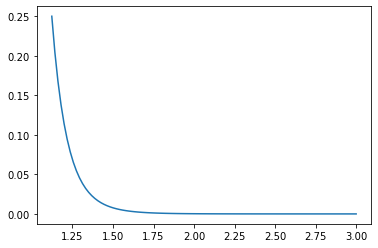

In [169]:
xgrid = np.linspace(2**(1/6),3,100)
plt.plot(xgrid, (1/xgrid)**12)
plt.plot()

### Create the model

In [12]:
model = HardDisks(N=N,
                  L=L,
                  sigma=sigma,
                  eps=1500)

NameError: name 'N' is not defined

In [99]:
model.smooth_overlap_hoomd_tf(np.random.random(128) * 3 - 1.5)

<tf.Tensor: shape=(), dtype=float32, numpy=8.803022e+16>

In [28]:
import gsd.hoomd

In [29]:
f = gsd.hoomd.open(name='trajectory.gsd', mode='rb')

In [30]:
# permute indistinguishable particles to minimize RMSD wrt reference structure
from deep_boltzmann.sampling.permutation import HungarianMapper
mapper = HungarianMapper(xref=f[0].particles.position[:,:2].reshape(1,-1),
                         identical_particles=np.arange(len(f[0].particles.position)))


In [12]:
Xtrain = np.load('Xtrain_0p75_1m.npy')
phi = 0.75 # packing fraction
sigma = 1
N = 64
L = (N*(np.pi*0.25*sigma**2)/phi)**0.5
model = HardDisks(N=len(Xtrain[0])//2,
                  L=L,
                  sigma=sigma,
                  eps=500)

In [233]:
Xtrain = np.load('Xtrain_0p75_5m.npy')
phi = 0.75 # packing fraction
sigma = 1
N = 64
L = (N*(np.pi*0.25*sigma**2)/phi)**0.5
model = HardDisks(N=len(Xtrain[0])//2,
                  L=L,
                  sigma=sigma,
                  eps=500)

In [211]:
Xtrain = np.load('Xtrain_0p75_100k_long.npy')
phi = 0.75 # packing fraction
sigma = 1
N = 64
L = (N*(np.pi*0.25*sigma**2)/phi)**0.5
model = HardDisks(N=len(Xtrain[0])//2,
                  L=L,
                  sigma=sigma,
                  eps=1500)

In [204]:
Xtrain = np.load('Xtrain_0p3_100k_no_sort.npy')
phi = 0.3 # packing fraction
sigma = 1
N = 36
L = (N*(np.pi*0.25*sigma**2)/phi)**0.5
model = HardDisks(N=len(Xtrain[0])//2,
                  L=L,
                  sigma=sigma,
                  eps=500)

In [12]:
Xtrain = np.load('Xtrain_0p3_1m.npy')
phi = 0.3 # packing fraction
sigma = 1
N = 36
L = (N*(np.pi*0.25*sigma**2)/phi)**0.5
model = HardDisks(N=len(Xtrain[0])//2,
                  L=L,
                  sigma=sigma,
                  eps=500)

In [23]:
Xtrain = np.load('Xtrain_0p3_5m.npy')
phi = 0.3 # packing fraction
sigma = 1
N = 36
L = (N*(np.pi*0.25*sigma**2)/phi)**0.5
model = HardDisks(N=len(Xtrain[0])//2,
                  L=L,
                  sigma=sigma,
                  eps=1500)

In [12]:
# Xtrain = np.load('Xtrain_0p1_1m.npy')
phi = 0.1 # packing fraction
sigma = 1
N = 36
L = (N*(np.pi*0.25*sigma**2)/phi)**0.5
model = HardDisks(N=N,
                  L=L,
                  sigma=sigma,
                  eps=1000)

In [12]:
# Xtrain = np.load('Xtrain_1024_706_10k.npy')
phi = 0.706 # packing fraction
sigma = 1
N = 1024
L = (N*(np.pi*0.25*sigma**2)/phi)**0.5
model = HardDisks(N=N,
                  L=L,
                  sigma=sigma,
                  eps=50)

### Train with the linear combination of two loss functions

In [13]:
def act(x):
    return -tf.nn.relu(x)

In [14]:
import numpy as np
print(np.__version__)

1.19.5


In [15]:
# reset model
#bg = invnet(model.dim, 'LRRRRRRRRRRRR', overlap_model=model, nl_layers=4, nl_hidden=200, #100
bg = invnet(model.dim, 'LRRRRRRRRR', overlap_model=model, nl_layers=3, nl_hidden=200, #200, #100
#            nl_activation='tanh', nl_activation_t='tanh', L=L)
           nl_activation='tanh', nl_activation_t='relu', L=L)

L<RRRRRRRRR>


In [16]:
batchsize = 300

In [286]:
hist_bg = bg.train_z(x=Xtrain[::1],epochs=2,lr=0.00001,batch_size=batchsize)

Epoch 1/2
 3/10 [========>.....................] - ETA: 7s - loss: nan      

KeyboardInterrupt: 

In [15]:
np.mean(Xtrain.reshape(len(Xtrain),-1,2),axis=0)

NameError: name 'Xtrain' is not defined

In [16]:
plot_config_wrap(model.wrap(bg.Tzx.predict(np.zeros_like(sample_x[0:1])+0.).reshape(-1,2)),L=L)
# plot_config_wrap(model.wrap(np.mean(Xtrain.reshape(len(Xtrain),-1,2),axis=0)),L=L)

NameError: name 'plot_config_wrap' is not defined

In [110]:
hist_bg = bg.train_both(x=Xtrain[::1],epochs=5,lr=0.00003,batch_size=batchsize)

Epoch 1/5


KeyboardInterrupt: 

In [17]:
hist_bg = bg.train_x(batches=100,epochs=12,lr=0.0001,batch_size=batchsize)


Epoch 1/12
100/100 [==============================] - 19s 155ms/step - loss: 84876.2664
Epoch 2/12
100/100 [==============================] - 16s 156ms/step - loss: 50560.1373
Epoch 3/12
100/100 [==============================] - 16s 156ms/step - loss: 50602.5740
Epoch 4/12
100/100 [==============================] - 16s 156ms/step - loss: 50681.3979
Epoch 5/12
100/100 [==============================] - 16s 156ms/step - loss: 50739.0883
Epoch 6/12
100/100 [==============================] - 16s 156ms/step - loss: 50816.1704
Epoch 7/12
100/100 [==============================] - 16s 156ms/step - loss: 50822.7169
Epoch 8/12
100/100 [==============================] - 16s 156ms/step - loss: 50814.6445
Epoch 9/12
100/100 [==============================] - 16s 156ms/step - loss: 50866.7422
Epoch 10/12
100/100 [==============================] - 16s 156ms/step - loss: 50808.2192
Epoch 11/12
100/100 [==============================] - 16s 155ms/step - loss: 50799.6194
Epoch 12/12
100/100 [=========

In [18]:
hist_bg = bg.train_x(batches=100,epochs=6,lr=0.001,batch_size=batchsize)

Epoch 1/6
100/100 [==============================] - 19s 155ms/step - loss: 53059.8758
Epoch 2/6
100/100 [==============================] - 16s 155ms/step - loss: 52865.4131
Epoch 3/6
100/100 [==============================] - 16s 156ms/step - loss: 41202.0433
Epoch 4/6
100/100 [==============================] - 16s 155ms/step - loss: 18109.8966
Epoch 5/6
100/100 [==============================] - 16s 155ms/step - loss: 13164.8394
Epoch 6/6
100/100 [==============================] - 16s 155ms/step - loss: 12890.3723


In [19]:
model.eps = 250
hist_bg = bg.train_x(batches=100,epochs=3,lr=0.001,batch_size=batchsize)

Epoch 1/3
100/100 [==============================] - 19s 154ms/step - loss: 27801.0581
Epoch 2/3
100/100 [==============================] - 15s 154ms/step - loss: 13624.9307
Epoch 3/3
100/100 [==============================] - 15s 154ms/step - loss: 13327.3626


In [23]:
model.eps = 1000
hist_bg = bg.train_x(batches=100,epochs=6,lr=0.001,batch_size=batchsize)

Epoch 1/3
100/100 [==============================] - 19s 156ms/step - loss: 22155.7444
Epoch 2/3
100/100 [==============================] - 15s 153ms/step - loss: 13383.4234
Epoch 3/3
100/100 [==============================] - 15s 153ms/step - loss: 12644.5963


In [24]:
model.eps = 2000
hist_bg = bg.train_x(batches=100,epochs=10,lr=0.001,batch_size=batchsize)

Epoch 1/10
100/100 [==============================] - 19s 155ms/step - loss: 22195.4423
Epoch 2/10
100/100 [==============================] - 15s 155ms/step - loss: 13170.0634
Epoch 3/10
100/100 [==============================] - 15s 154ms/step - loss: 13809.4158
Epoch 4/10
100/100 [==============================] - 15s 154ms/step - loss: 12539.8852
Epoch 5/10
100/100 [==============================] - 15s 154ms/step - loss: 14380.5435
Epoch 6/10
100/100 [==============================] - 15s 155ms/step - loss: 12408.0200
Epoch 7/10
100/100 [==============================] - 15s 154ms/step - loss: 12400.6160
Epoch 8/10
100/100 [==============================] - 15s 154ms/step - loss: 13289.7103
Epoch 9/10
100/100 [==============================] - 15s 155ms/step - loss: 12939.0820
Epoch 10/10
100/100 [==============================] - 15s 155ms/step - loss: 12342.3914


KeyboardInterrupt: 

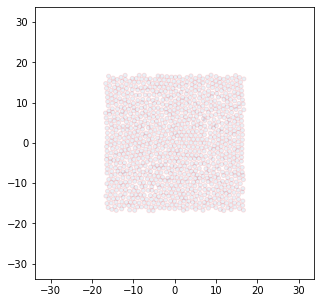

In [27]:
zeroes = np.zeros_like(sample_x[0:1])
# print(zeroes)
for i in range(0, 11):
    zeroes[0][0] = i
    if i == 0:
        fig, ax = plot_config_wrap_multiple(bg.Tzx.predict(zeroes).reshape(-1,2),L=L*2, first=True)
    else:
        plot_config_wrap_multiple(bg.Tzx.predict(zeroes).reshape(-1,2),L=L*2, first=False, fig=fig, ax=ax)
zeroes = np.zeros_like(sample_x[0:1])
# print(zeroes)
for i in range(0, 11):
    zeroes[0][1] = i
    if i == 0:
        fig, ax = plot_config_wrap_multiple(bg.Tzx.predict(zeroes).reshape(-1,2),L=L*2, first=True)
    else:
        plot_config_wrap_multiple(bg.Tzx.predict(zeroes).reshape(-1,2),L=L*2, first=False, fig=fig, ax=ax)
zeroes = np.zeros_like(sample_x[0:1])
# print(zeroes)
for i in range(0, 11):
    zeroes[0][2] = i
    if i == 0:
        fig, ax = plot_config_wrap_multiple(bg.Tzx.predict(zeroes).reshape(-1,2),L=L*2, first=True)
    else:
        plot_config_wrap_multiple(bg.Tzx.predict(zeroes).reshape(-1,2),L=L*2, first=False, fig=fig, ax=ax)

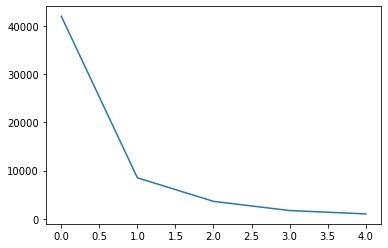

In [37]:
fig, ax = plt.subplots()
ax.plot(hist_bg.history['loss'])

In [111]:
print(tf.__version__)

2.4.1


In [38]:
a, sample_x, b, overlap_x, w, logw = bg.sample(nsample=100, temperature=1)

ResourceExhaustedError: OOM when allocating tensor with shape[100,1024,1024] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:FloorDiv]

In [37]:
np.mean(overlap_x)

20491.93

In [99]:
# np.zeros_like(sample_x[0:1])+0.2

In [100]:
# np.linalg.norm(a,axis=1)

In [101]:
# a[0]

In [603]:
# np.array([np.linalg.norm(a,axis=1),b]).T

array([[8.46199682e+00, 2.82544659e-16],
       [8.93540573e+00, 4.59879313e-18],
       [7.38280747e+00, 1.45950608e-12],
       [9.25789848e+00, 2.44678442e-19],
       [9.47650869e+00, 3.15690892e-20],
       [8.51270122e+00, 1.83734287e-16],
       [8.26341027e+00, 1.48706108e-15],
       [8.88630304e+00, 7.12308409e-18],
       [8.27129682e+00, 1.39319661e-15],
       [8.71533774e+00, 3.20717556e-17],
       [8.84716154e+00, 1.00784353e-17],
       [8.55810795e+00, 1.24701870e-16],
       [8.43262211e+00, 3.62119335e-16],
       [7.72598885e+00, 1.09215665e-13],
       [8.61404036e+00, 7.71449395e-17],
       [7.96473304e+00, 1.67817195e-14],
       [8.89756549e+00, 6.44429890e-18],
       [8.52382102e+00, 1.67129554e-16],
       [9.26625593e+00, 2.26453017e-19],
       [8.14351570e+00, 3.97630280e-15],
       [8.00222016e+00, 1.24411890e-14],
       [9.97902172e+00, 2.37841615e-22],
       [7.21056043e+00, 5.12910011e-12],
       [8.75973880e+00, 2.17588330e-17],
       [7.538664

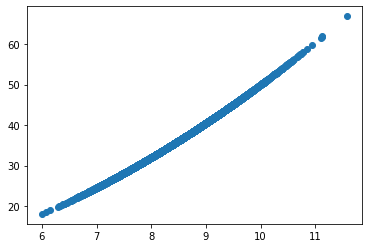

In [138]:
plt.scatter(np.linalg.norm(a,axis=1),b)

(array([3.630e+02, 4.304e+03, 3.872e+03, 2.960e+02, 4.000e+00, 1.000e+00,
        5.000e+00, 9.100e+01, 2.080e+02, 1.760e+02, 1.310e+02, 8.600e+01,
        6.200e+01, 5.200e+01, 5.000e+01, 3.400e+01, 2.800e+01, 2.600e+01,
        3.000e+01, 1.700e+01, 1.600e+01, 1.300e+01, 1.800e+01, 1.800e+01,
        1.100e+01, 6.000e+00, 6.000e+00, 6.000e+00, 6.000e+00, 8.000e+00,
        6.000e+00, 4.000e+00, 5.000e+00, 3.000e+00, 0.000e+00, 3.000e+00,
        2.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 4.000e+00,
        3.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 4.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

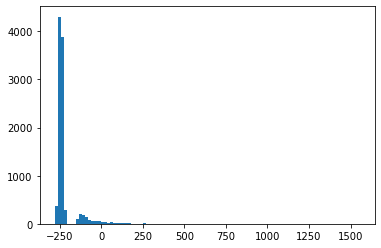

In [198]:
plt.hist(logw,bins=100)

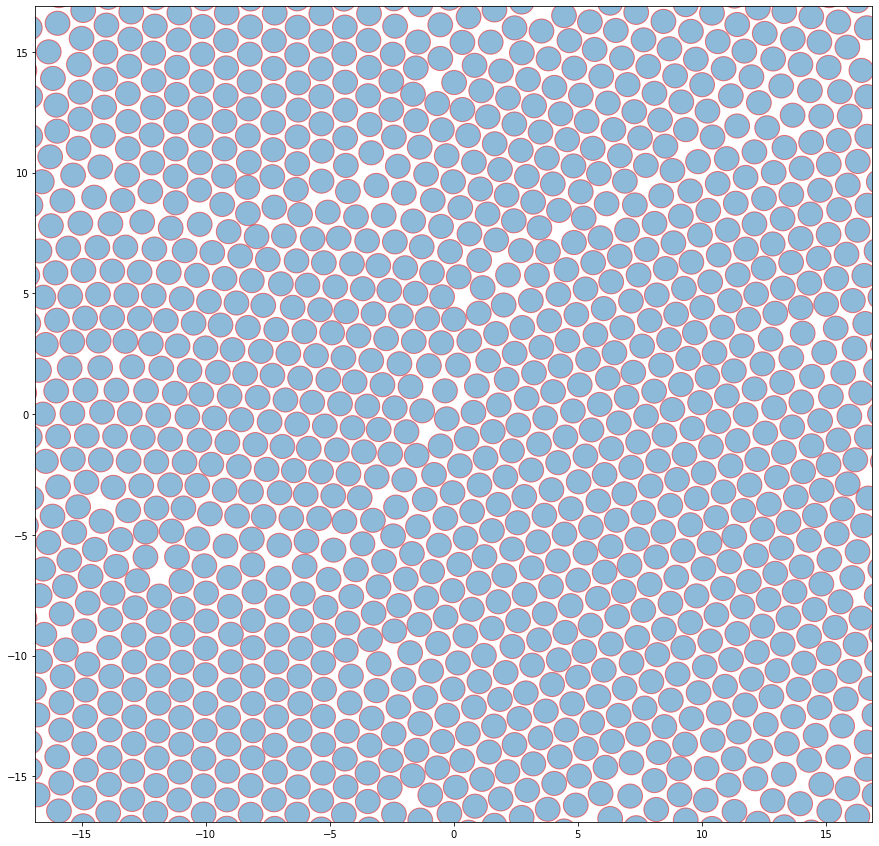

In [29]:
plot_config_wrap(model.wrap(bg.Tzx.predict(np.zeros_like(sample_x[0:1])+0.)).reshape(-1,2),L=L)

In [30]:
model.smooth_overlap_tf(model.wrap(bg.Tzx.predict(np.zeros_like(sample_x[0:1]))))

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>

In [24]:
sidx = 84
print(model.smooth_overlap_hoomd_tf(model.wrap(sample_x[sidx:sidx+1])))
print(model.smooth_overlap_tf(model.wrap(sample_x[sidx:sidx+1])))

AttributeError: module 'hoomd.data' has no attribute 'snapshot'

In [31]:
L/2

16.8757301732595

In [32]:
sample_x.min(),sample_x.max()

(-16.844215, 16.866858)

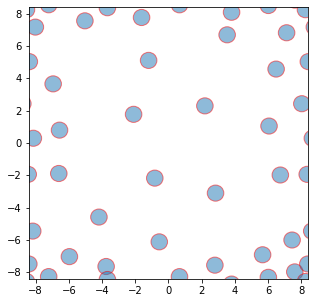

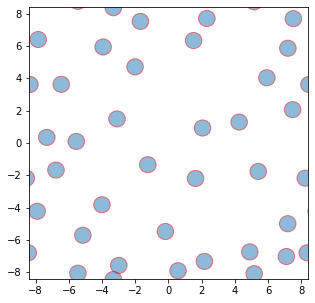

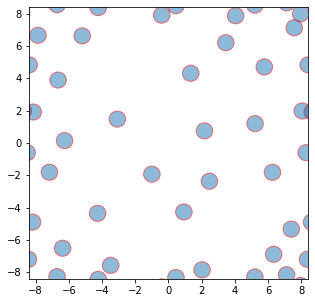

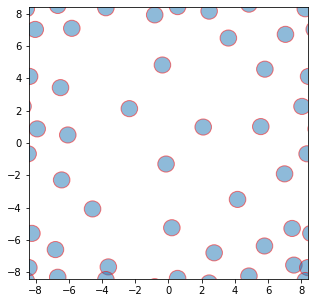

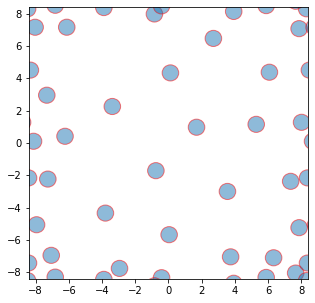

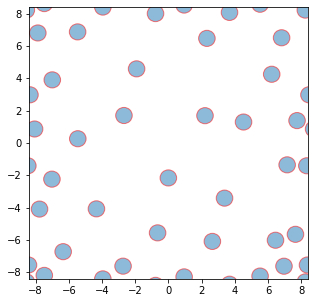

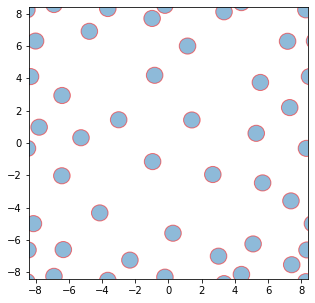

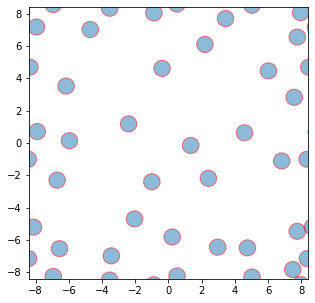

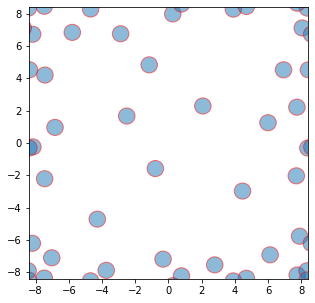

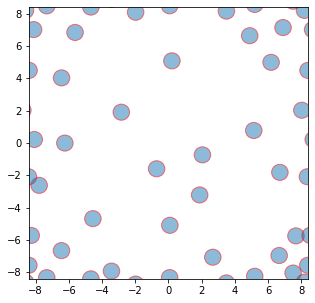

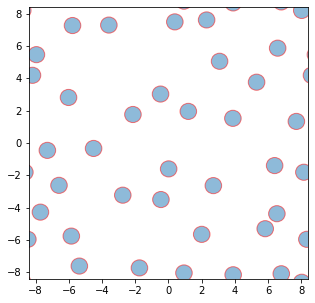

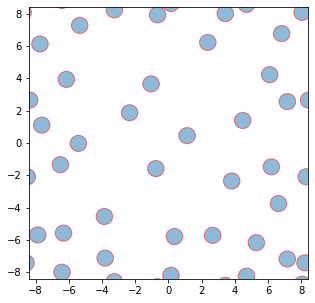

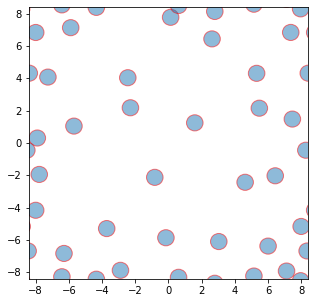

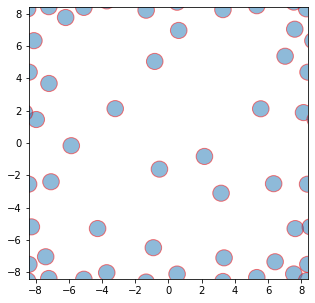

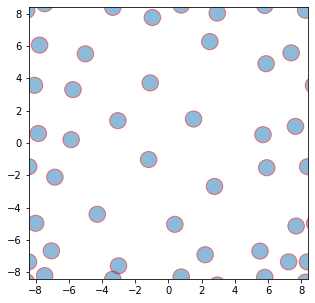

In [29]:
for i in range(15):
    plot_config_wrap(model.wrap(sample_x)[i:i+1].reshape(-1,2),L=L)

/opt/anaconda3/envs/BG/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


KeyboardInterrupt: 

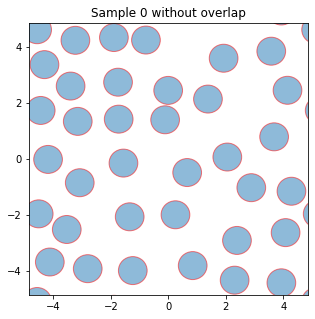

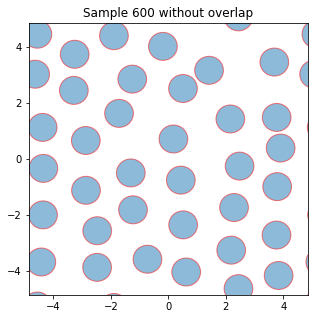

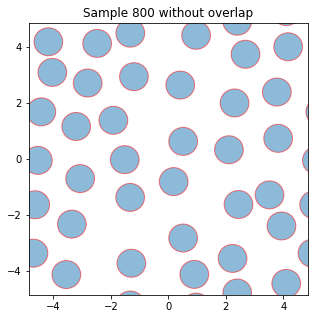

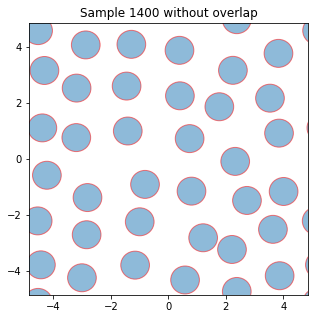

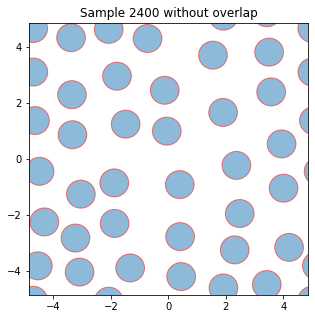

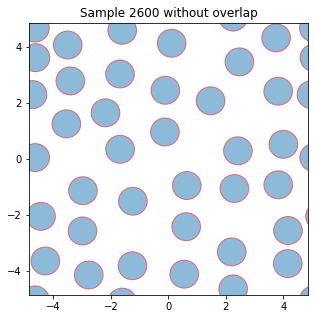

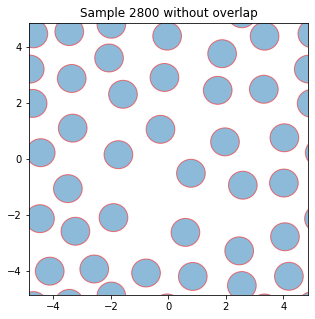

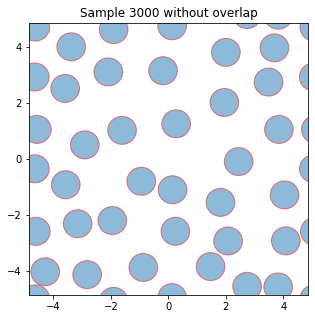

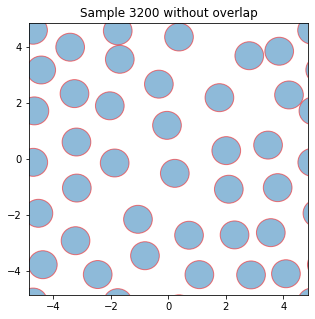

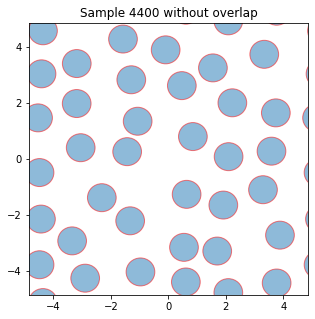

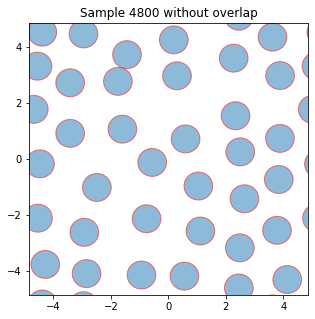

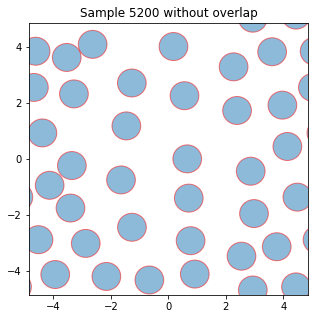

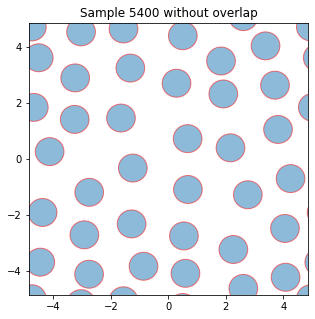

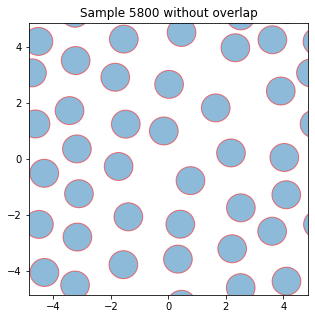

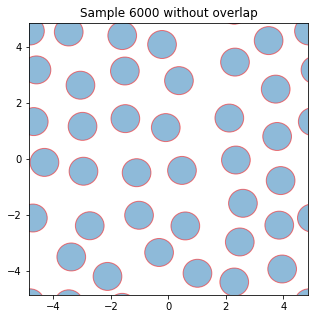

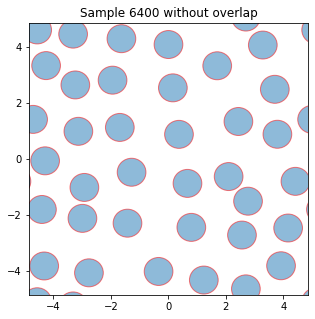

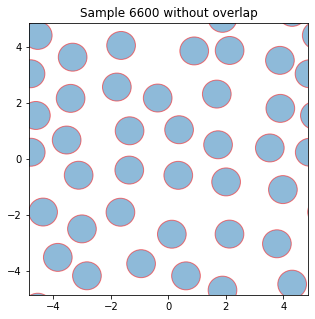

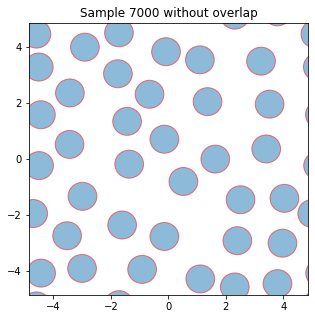

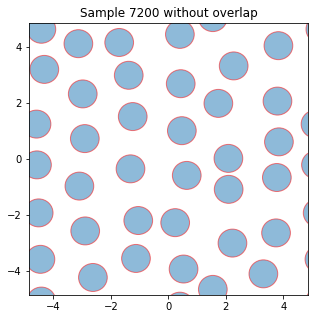

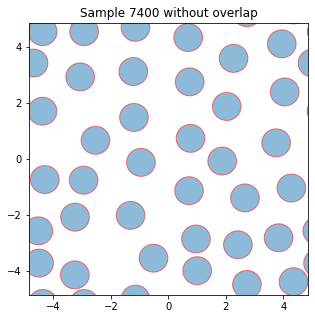

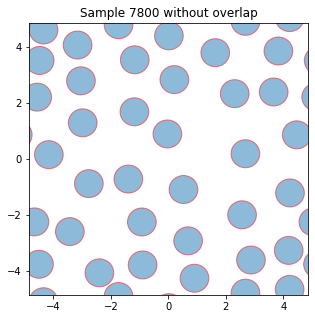

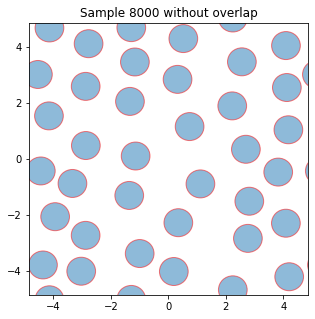

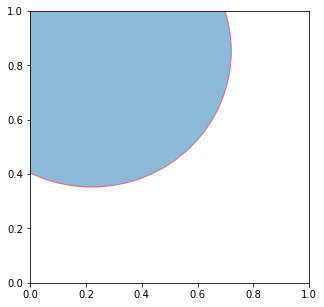

In [119]:
# plot_at_most = 50
# sts = (len(sample_x)//plot_at_most)
# for i in range(plot_at_most):
#     if model.smooth_overlap_tf(sample_x[i*sts:i*sts+1]) == 0:
#         plot_config_wrap(model.wrap(sample_x)[i*sts:i*sts+1].reshape(-1,2),L=L, title=f'Sample {i*sts} without overlap')

In [33]:
sum(model.smooth_overlap_tf(sample_x).numpy() == 0) / len(sample_x)

0.0

In [39]:
model.eps

250

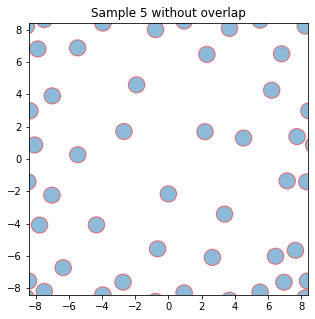

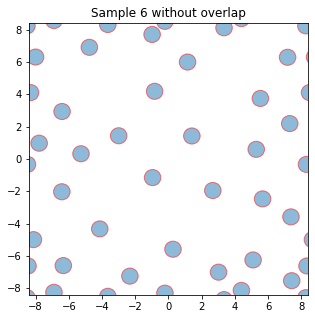

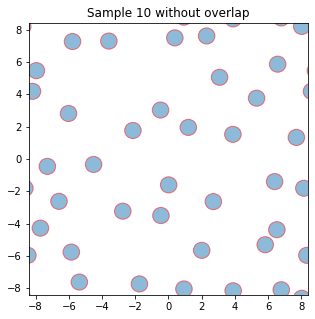

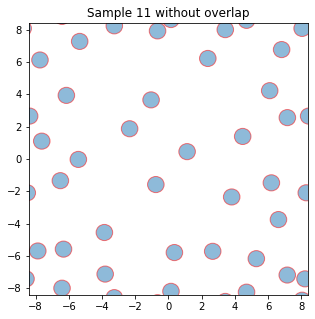

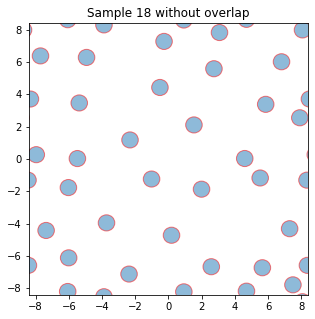

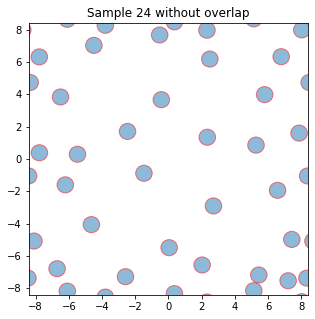

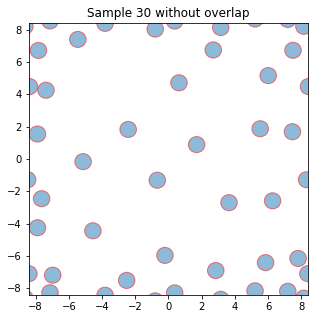

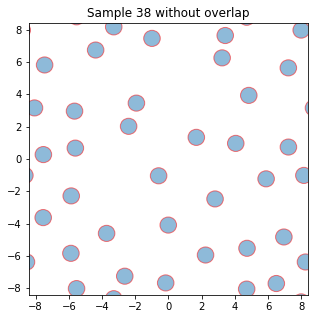

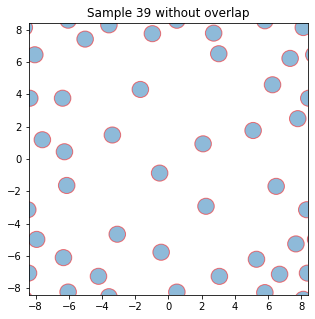

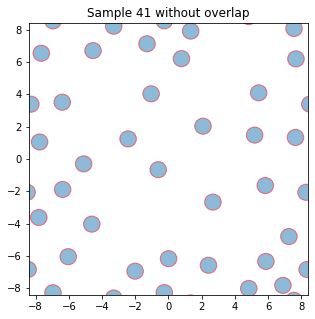

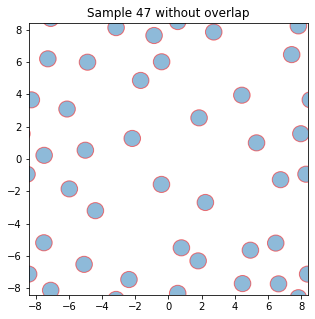

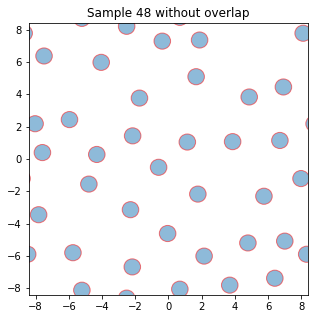

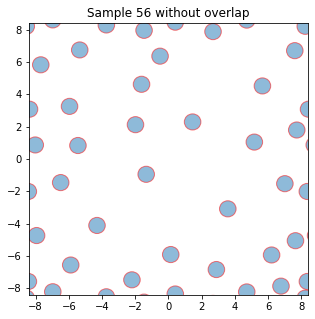

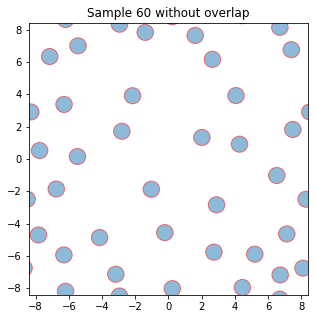

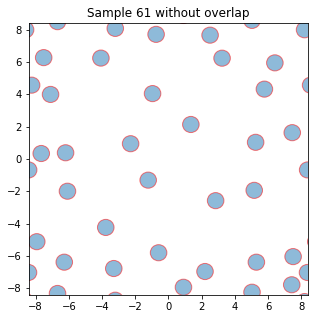

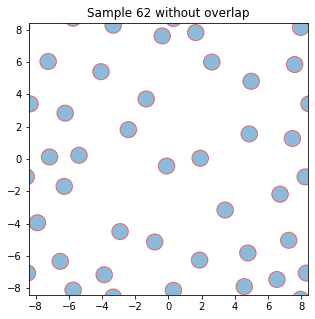

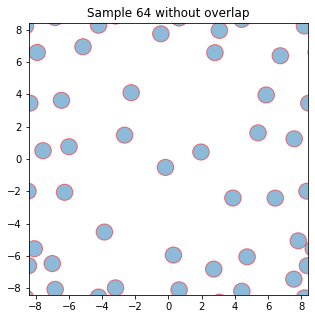

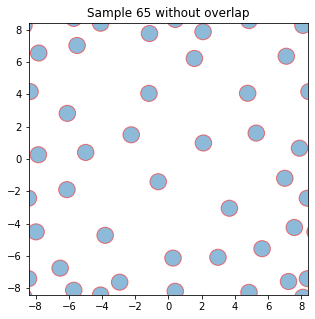

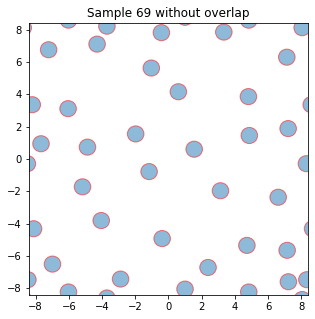

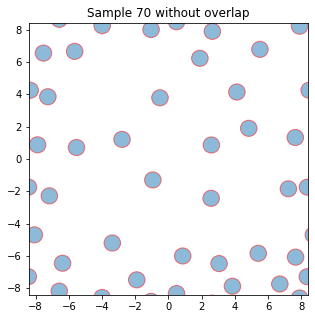

In [31]:
plot_at_most = 19
sts = (len(sample_x)//plot_at_most)
plotted = 0
zero_overlap_ones = np.where(model.smooth_overlap_tf(sample_x).numpy() == 0)[0]
for i in zero_overlap_ones:
    if model.smooth_overlap_tf(sample_x[i:i+1]) == 0:
        plot_config_wrap(model.wrap(sample_x)[i:i+1].reshape(-1,2),L=L, title=f'Sample {i} without overlap')
        plotted += 1
    if plotted > plot_at_most:
        break

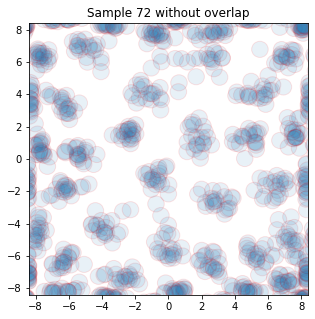

In [30]:
plot_at_most = 20
plotted = 0
zero_overlap_ones = np.where(model.smooth_overlap_tf(sample_x).numpy() == 0)[0]
for i in zero_overlap_ones:
    if model.smooth_overlap_tf(sample_x[i:i+1]) == 0:
        if plotted == 0:
            fig, ax = plot_config_wrap_multiple(model.wrap(sample_x)[i:i+1].reshape(-1,2),L=L, title=f'Sample {i} without overlap', first=True)
        else:
            plot_config_wrap_multiple(model.wrap(sample_x)[i:i+1].reshape(-1,2),L=L, title=f'Sample {i} without overlap', first=False, fig=fig, ax=ax)
        plotted += 1
    if plotted > plot_at_most:
        break

In [190]:
plot_at_most = 40


for i in range(plot_at_most):

    if i == 0:
        fig, ax = plot_config_wrap_multiple(model.wrap(sample_x)[i:i+1].reshape(-1,2),L=L, title=f'Sample {i} without overlap', first=True)
    else:
        plot_config_wrap_multiple(model.wrap(sample_x)[i:i+1].reshape(-1,2),L=L, title=f'Sample {i} without overlap', first=False, fig=fig, ax=ax)


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f81e06fdf80> (for post_execute):


KeyboardInterrupt: 

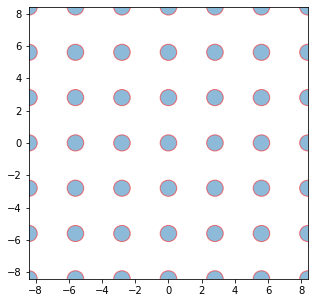

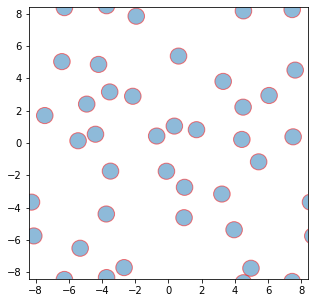

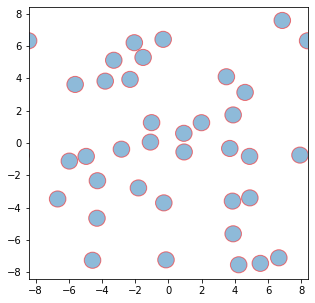

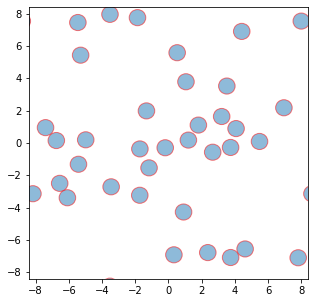

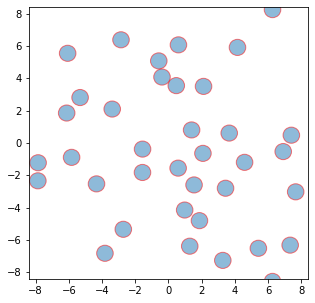

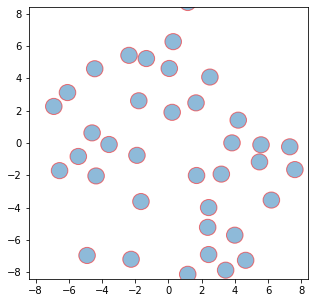

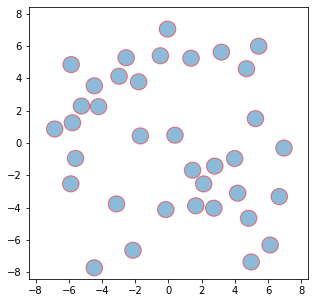

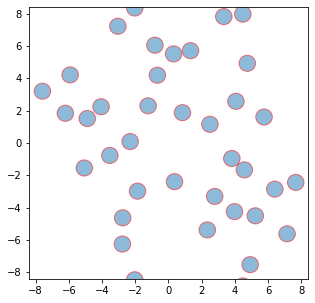

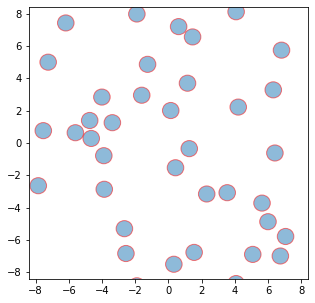

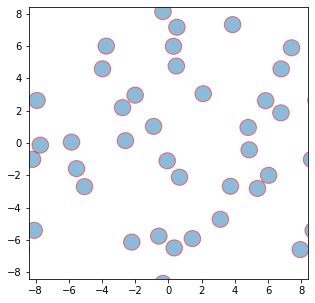

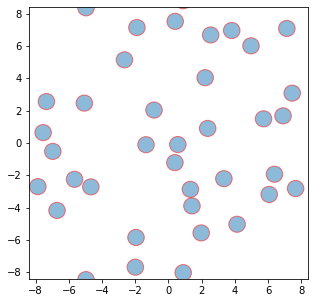

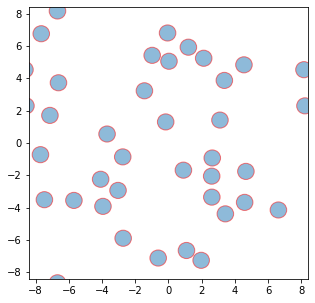

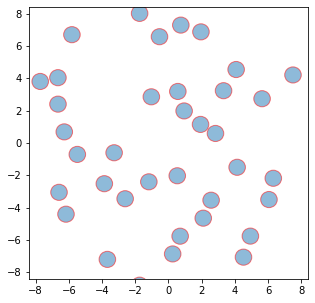

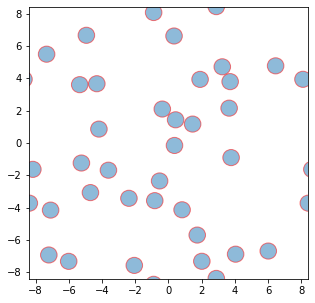

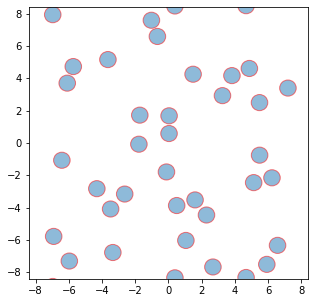

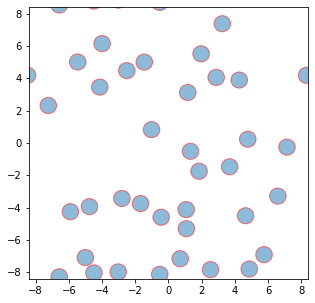

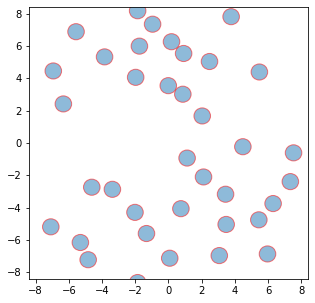

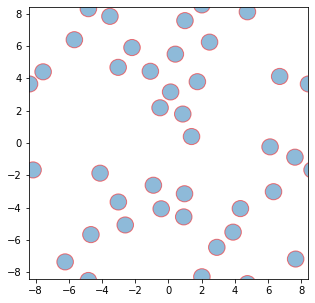

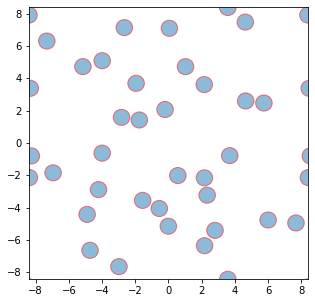

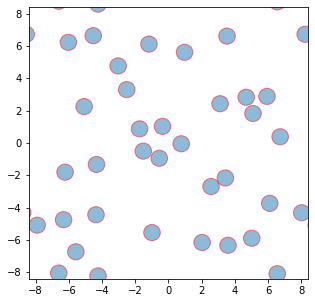

In [186]:
for i in range(20):
    plot_config_wrap(model.wrap(Xtrain[i*800:i*800+1]).reshape(-1,2),L=L)

(array([6.06e+03, 2.14e+02, 1.82e+02, 1.89e+02, 1.86e+02, 2.03e+02,
        1.50e+02, 1.70e+02, 1.39e+02, 1.51e+02, 1.44e+02, 1.39e+02,
        1.34e+02, 1.26e+02, 1.44e+02, 1.01e+02, 1.33e+02, 9.90e+01,
        1.03e+02, 8.40e+01, 7.20e+01, 7.70e+01, 6.00e+01, 6.00e+01,
        6.20e+01, 6.40e+01, 6.70e+01, 5.10e+01, 4.00e+01, 3.90e+01,
        3.70e+01, 3.80e+01, 3.30e+01, 2.10e+01, 2.80e+01, 2.40e+01,
        2.80e+01, 2.80e+01, 2.20e+01, 2.40e+01, 1.90e+01, 1.80e+01,
        1.50e+01, 1.40e+01, 2.20e+01, 1.30e+01, 1.50e+01, 1.50e+01,
        7.00e+00, 9.00e+00, 8.00e+00, 4.00e+00, 5.00e+00, 5.00e+00,
        1.00e+01, 5.00e+00, 1.30e+01, 7.00e+00, 6.00e+00, 5.00e+00,
        5.00e+00, 5.00e+00, 4.00e+00, 2.00e+00, 3.00e+00, 5.00e+00,
        1.00e+00, 3.00e+00, 1.00e+00, 1.00e+00, 2.00e+00, 5.00e+00,
        0.00e+00, 1.00e+00, 0.00e+00, 3.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 1.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00, 1.00e+00, 0.00e+00, 

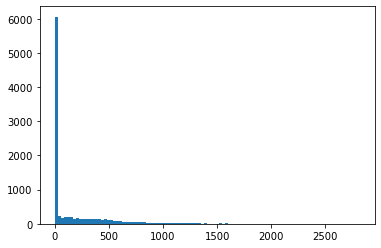

In [187]:
fig, ax = plt.subplots()
ax.hist(model.smooth_overlap_tf(sample_x).numpy(), bins=100)

/opt/anaconda3/envs/BG/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6623: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/opt/anaconda3/envs/BG/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6624: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

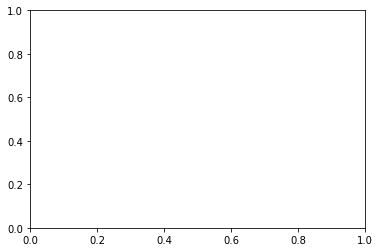

In [107]:
fig, ax = plt.subplots()
ax.hist(tf.keras.backend.eval(model.smooth_overlap_tf(sample_x)*w/tf.reduce_mean(w)),bins=20)
x = np.linspace(0,1000)

ax.set_yscale('log')

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0., 1000.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.]),
 array([-0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15, -0.1 ,
        -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,
         0.4 ,  0.45,  0.5 ], dtype=float32),
 <BarContainer object of 20 artists>)

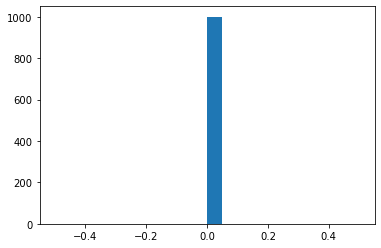

In [423]:
fig, ax = plt.subplots()
ax.hist(tf.keras.backend.eval(model.smooth_overlap_tf(Xtrain[0:1000])),bins=20)

In [427]:
np.array([f[-1].particles.position[:,:2].flatten(), Xtrain[-1]]).T

array([[ 0.70426345,  3.50787544],
       [ 3.59875178,  4.00698233],
       [ 0.66067493,  3.8949368 ],
       [-0.55142546, -4.13938951],
       [ 2.70731091,  4.798419  ],
       [-2.20287609, -2.57125878],
       [ 1.05227089,  4.02671719],
       [ 2.57348919, -1.51185513],
       [-2.39799094,  4.40564632],
       [-2.09704113, -0.10306334],
       [ 1.71431649,  4.08311272],
       [-1.5266993 ,  2.52854395],
       [ 4.798419  , -4.17038774],
       [-2.57125878,  4.70190287],
       [-3.92576528, -3.74221063],
       [-1.51659548, -3.81480908],
       [-0.9295913 , -2.59081316],
       [-0.00864144, -3.09157872],
       [ 4.02671719, -3.92576528],
       [-1.51185513, -1.51659548],
       [ 2.86907482, -4.14851284],
       [ 1.17682588,  0.75898933],
       [-0.87459266, -4.33959293],
       [-2.78883696,  3.30661368],
       [ 4.08311272, -1.9466269 ],
       [ 2.52854395,  2.85835433],
       [ 4.40564632, -0.78210586],
       [-0.10306334, -4.76854944],
       [-1.65577376,

In [436]:
def plot_config_wrap_num(pts,L=1,title=None):
    fig, ax = plt.subplots()
    fig.set_size_inches(5,5)
    pts_addl = []
    for p in pts:
        if p[0] < -L/2+0.5:
            pts_addl.append([p[0]+L, p[1]])  
            if p[1] < -L/2+0.5:
                pts_addl.append([p[0]+L, p[1]+L])
            if p[1] > -L/2+0.5:
                pts_addl.append([p[0]+L, p[1]-L])
        if p[0] > -L/2+0.5:
            pts_addl.append([p[0]-L, p[1]])
            if p[1] < -L/2+0.5:
                pts_addl.append([p[0]-L, p[1]+L])
            if p[1] > -L/2+0.5:
                pts_addl.append([p[0]-L, p[1]-L])
        if p[1] < -L/2+0.5:
            pts_addl.append([p[0], p[1]+L])
        if p[1] > -L/2+0.5:
            pts_addl.append([p[0], p[1]-L])
        
    circles = [plt.Circle(p,.5,alpha=0.5,ec='red') for p in pts]
    circles2 = [plt.Circle(p,.5,alpha=0.5,ec='red') for p in pts_addl]
    for idx, c in enumerate(circles):
        ax.add_patch(c)
        plt.text(pts[idx][0],pts[idx][1],f'{idx}')
    for c in circles2:
        ax.add_patch(c)
    ax.set_xlim(-L/2,L/2)
    ax.set_ylim(-L/2,L/2)
    if title is not None:
        ax.set_title(title)

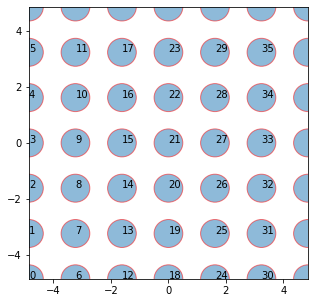

In [439]:
plot_config_wrap_num(model.wrap(f[0].particles.position),L=L)

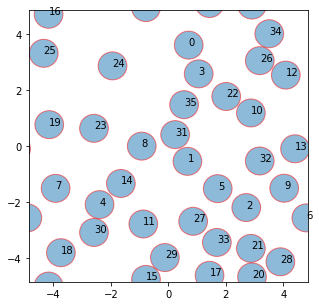

In [438]:
plot_config_wrap_num(model.wrap(f[-1].particles.position),L=L)

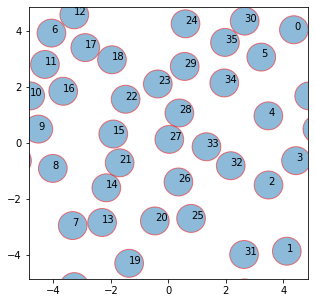

In [544]:
plot_config_wrap_num(Xtrain_new[100].reshape(-1,2),L=L)

In [531]:
Xtest = Xtrain[0].reshape(-1,2)

In [532]:
dist_frac(Xtest,1.1)

0.0

In [526]:
dist_frac_array = np.zeros((len(Xtrain)))
for i in range(len(Xtrain)):
#     if i % 1000 == 0:
#         print(dist_frac(Xtrain[i].reshape(-1,2),4))
    dist_frac_array[i] = dist_frac(Xtrain[i].reshape(-1,2),1.1)

In [539]:
(dist_frac_array > 0.4).sum()


18732

In [540]:
Xtrain_new = Xtrain[dist_frac_array>0.4]

In [541]:
np.where(dist_frac_array > 0.4)

(array([   71,    72,    77, ..., 99987, 99988, 99999]),)

(array([6.6600e+02, 3.7180e+03, 1.8164e+04, 1.9337e+04, 3.1032e+04,
        1.9559e+04, 5.1840e+03, 2.1120e+03, 2.1200e+02, 1.6000e+01]),
 array([0.   , 0.075, 0.15 , 0.225, 0.3  , 0.375, 0.45 , 0.525, 0.6  ,
        0.675, 0.75 ]),
 <BarContainer object of 10 artists>)

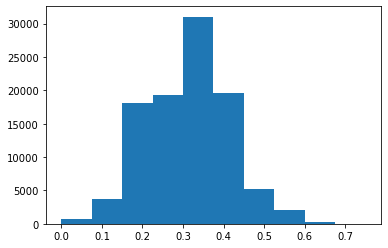

In [534]:
plt.hist(dist_frac_array)

In [520]:
def dist_frac(Xtest, thres=5):
    dist_mat = ((Xtest[:,:,None] - Xtest[:,:,None].T)**2).sum(1)
    dist_mat[dist_mat == 0] = 999
#     print(dist_mat)
#     print(np.min(dist_mat, axis=1))
    dist_mat = np.sqrt(np.min(dist_mat, axis=1)).flatten()
#     print(dist_mat)
    return np.sum(dist_mat < thres) / len(Xtest)

In [93]:
phi = 0.3 # packing fraction
sigma = 1
N = 2
L = (N*(np.pi*0.25*sigma**2)/phi)**0.5
model2 = HardDisks(N=2,
                  L=L,
                  sigma=sigma,
                  eps=500)

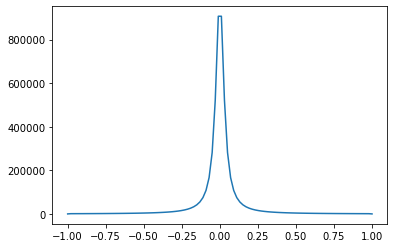

In [94]:
pot = []
for i in np.linspace(-1, 1, 100):
    coords = [[0.0,0.0,i,0.0]]
    pot.append(model2.smooth_overlap_tf(np.array(coords)).numpy())
#     print(model2.smooth_overlap_tf(np.array(coords)).numpy())
#     plot_config_wrap(np.array(coords).reshape(-1,2), L=L)
plt.plot(np.linspace(-1, 1,100),pot)

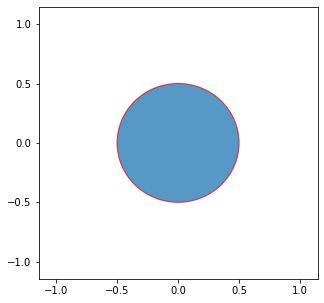

In [89]:
plot_config_wrap(np.array([[0.0,0.0,0.0,0]]).reshape(-1,2), L=L)

In [92]:
def log1pexp(x):
  return tf.math.log(1 + tf.exp(x))

In [93]:
log1pexp(tf.constant(3.)).numpy()

3.0485873

In [94]:
x = tf.Variable(100.)

with tf.GradientTape() as tape:
    y = log1pexp(x)
#     dy = tf.GradientTape(y, x) # Will be NaN when evaluated.

dy_dx = tape.gradient(y, x)


In [95]:
print(dy_dx)

tf.Tensor(nan, shape=(), dtype=float32)


In [96]:
@tf.custom_gradient
def log1pexp(x):
  e = tf.exp(x)
  def grad(dy):
    return dy * (1 - 1 / (1 + e))
  return tf.math.log(1 + e), grad

In [97]:
x = tf.Variable(100.)
with tf.GradientTape() as tape:
    y = log1pexp(x)
dy_dx = tape.gradient(y, x)

In [98]:
print(dy_dx)

tf.Tensor(1.0, shape=(), dtype=float32)
